In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from orbits import Orbit
from extras.enmax import find_en_max
from extras.functions import en_search, plot_modes
from extras.sep import find_slr

In [2]:
# set params
aa = 0.998
slr = 6
ecc = 0
x = 1

In [3]:
orbit = Orbit(aa, slr, ecc, x)

In [11]:
ell = 2
# em = 2
aa = 0.998
slr = 6
# ecc = 0.5
x = 1
for ecc in [0.8]:
    for em in range(2, ell + 1):
        orbit = Orbit(aa, slr, ecc, x)
        en_predicted = find_en_max(aa, slr, ecc, x, em)
        print(en_predicted)
        en_min = en_predicted - 20
        en_max = en_predicted + 21
        results = en_search(orbit, ell, em, en_min, en_max)
        datadir = ('./data/a={0}_p={1}_e={2}_x={3}/'.format(orbit.aa, orbit.slr, orbit.ecc, orbit.x))
        if not os.path.exists(datadir):
            os.makedirs(datadir)
        with open(datadir + 'ell={0}_em={1}.txt'.format(orbit.ell, orbit.em), 'w') as f:
            np.savetxt(f, results[:, 2:])

23
[2, 2, 3, 8.803447723595677e-07]
[2, 2, 4, 2.390171538752737e-07]
[2, 2, 5, 1.355734905912934e-08]
[2, 2, 6, 6.630646208804118e-07]
[2, 2, 7, 2.392924196090999e-06]
[2, 2, 8, 5.134296767643178e-06]
[2, 2, 9, 8.606165074509944e-06]
[2, 2, 10, 1.241281724331819e-05]
[2, 2, 11, 1.6140074805643635e-05]
[2, 2, 12, 1.9428970045703534e-05]
[2, 2, 13, 2.2019265120344448e-05]
[2, 2, 14, 2.37645973405899e-05]
[2, 2, 15, 2.4625980114351297e-05]
[2, 2, 16, 2.4651866664968884e-05]
[2, 2, 17, 2.395226625533239e-05]
[2, 2, 18, 2.2672614648523355e-05]
[2, 2, 19, 2.0971051616176526e-05]
[2, 2, 20, 1.9000918541116443e-05]
[2, 2, 21, 1.6898921010522107e-05]
[2, 2, 22, 1.4778454316918455e-05]
[2, 2, 23, 1.2727133281017953e-05]
/Users/aaron/Documents/GitHub/pyfbt/pyfbt/flux/flux.py:223: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  im_res, im_err = quad(eq_im, 0, np.pi)
[2, 2, 24, 1.

KeyboardInterrupt: 

No handles with labels found to put in legend.


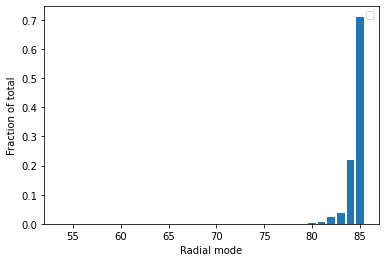

In [12]:
normed=True
if normed:
    plt.bar(results[:, 2], results[:, 3]/ np.sum(results[:, 3]))
else:
    plt.bar(results[:, 2], results[:, 3])


# plt.axvline(x=2, color='C3', label='Predicted radial max')
# plt.legend()
plt.xlabel('Radial mode')
plt.ylabel('Fraction of total')
plt.show()

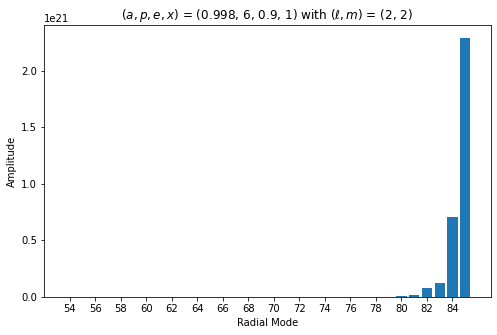

<Figure size 432x288 with 0 Axes>

In [9]:
ell = 2
em = 2
datadir = '/Users/aaron/Documents/GitHub/pyfbt/pyfbt/data/'
with open(datadir + 'a={0}_p={1}_e={2}_x={3}/ell={4}_em={5}.txt'.format(aa, slr, ecc, x, ell, em), 'r') as f:
    en, einf = np.loadtxt(f, unpack=True)

plt.figure(figsize=(8, 5))
plt.title(r'$(a, p, e, x)$ =' + ' ({0}, {1}, {2}, {3})'.format(aa, slr, ecc, x) + ' with ' +  r'$(\ell, m)$ = ' + '({0}, {1})'.format(ell, em))
plt.xticks(en[::2])
plt.xlabel('Radial Mode')
plt.ylabel('Amplitude')
plt.bar(en, einf)
plt.savefig(datadir + 'ell={0}_em={1}.png'.format(ell, em), dpi=100)
plt.show()
plt.clf()

In [ ]:
# plot the ell = em modes:
for ell in [2, 3, 4]:
    em = ell
    datadir = '/Users/aaron/Documents/GitHub/pyfbt/pyfbt/data/'
    with open(datadir + 'a={0}_p={1}_e={2}_x={3}/ell={4}_em={5}.txt'.format(aa, slr, ecc, x, ell, em), 'r') as f:
        en, einf = np.loadtxt(f, unpack=True)